In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

from matplotlib import pyplot as plt

In [84]:
games = pd.read_csv("appstore_games.csv",encoding='latin-1')
games.head()
df = games.copy()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## Data cleaning and analysis

In [3]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [4]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


Text(0.5, 1.0, 'Nan counts')

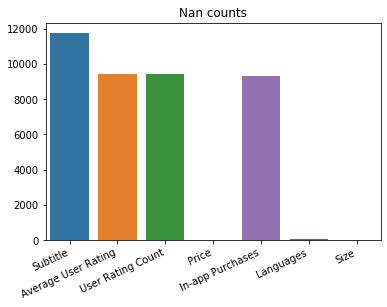

In [5]:
nan_counts = df.isna().sum()
ind = nan_counts[nan_counts>0].index
val = nan_counts[nan_counts>0].values
f = sns.barplot(ind, val)
f.set_xticklabels(f.get_xticklabels(), rotation='25', ha="right")
f.set_title('Nan counts')

In [6]:
# ID and URL are unique so they wont be able useful to predict the rating
# Subtitle has majority of Nan values so we will remove it too
df = df.drop(['URL', 'ID', 'Icon URL', 'Subtitle'], axis=1)

In [7]:
# Number of free games
(df[df["Price"]==0]["Price"]).count()

14212

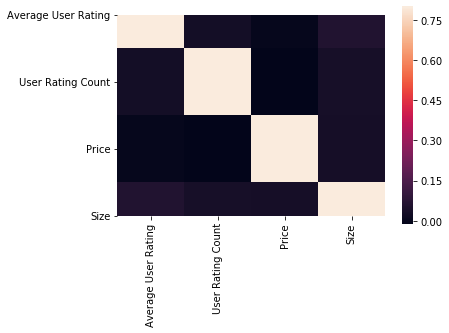

In [8]:
# pr=lotting correlation between numerical values
C_mat = df.corr()
sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [9]:
# Converting genres into one hot encoded values

mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(df['Genres'].str.split(', '))
labelClasses = mlb.classes_
print(len(labelClasses))

one_hot_genres = pd.DataFrame(expandedLabelData, columns=labelClasses)
one_hot_genres.head()

47


,Action,Adventure,Animals & Nature,Art,Board,Books,Business,Card,Casino,Casual,...,Social Networking,Sports,Sports & Activities,Stickers,Strategy,Travel,Trivia,Utilities,Weather,Word
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


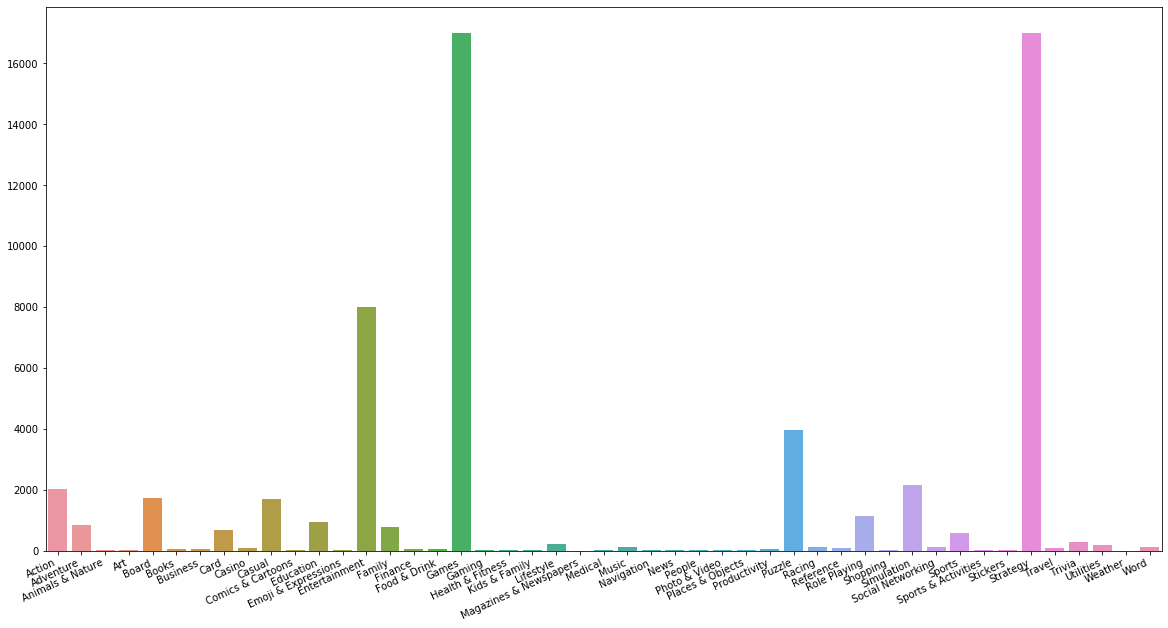

In [10]:
# Number of movies per category
genres = list(one_hot_genres.columns)
plt.figure(figsize=(20,10))
f = sns.barplot(genres, one_hot_genres.sum())
f.set_xticklabels(f.get_xticklabels(), rotation='25', ha="right");

In [11]:
# filling nan values in in-app purchases with the mode
mode_val = stats.mode(np.array(sum(list(df['In-app Purchases'].dropna().str.split(",")), [])).astype(float))[0][0]
df['In-app Purchases'].fillna(str(mode_val), inplace=True)

In [12]:
#Converting in app purchases to one-hot values
mlb_inapp = MultiLabelBinarizer()
expandedLabelData = mlb_inapp.fit_transform(df['In-app Purchases'].str.split(', '))
labelClasses = mlb_inapp.classes_

one_hot_inapp = pd.DataFrame(expandedLabelData, columns=labelClasses)
one_hot_inapp.head()

,0,0.0,0.49,0.99,1.49,1.99,10.99,109.99,11.99,119.99,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Count of in-app transactions')

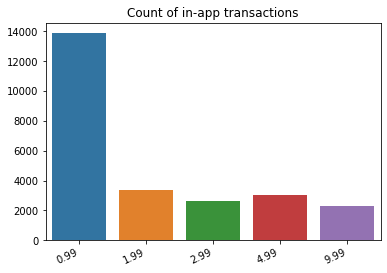

In [13]:
# visualising most commonly used in-app transaction value
max_10_prices = one_hot_inapp.sum().sort_values(ascending=False)[:5]
f = sns.barplot(max_10_prices.index, max_10_prices.values)
f.set_xticklabels(f.get_xticklabels(), rotation='25', ha="right")
f.set_title('Count of in-app transactions')

In [14]:
# Converting age ratings to integers
df["Age Rating"].unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

In [15]:
df["Age Rating"] = df["Age Rating"].replace("4+", 4).replace("9+",9).replace("12+", 12).replace("17+", 17)
df["Age Rating"].unique()

array([ 4,  9, 12, 17], dtype=int64)

In [16]:
# Replacing primary_genre and developer with label encoded values.
# One hot ancoding is not used because it would increase the dimensionality by abut 9000.
lb_genre = LabelEncoder()
df["Primary Genre"] = lb_genre.fit_transform(df["Primary Genre"])
lb_dev = LabelEncoder()
df["Developer"] = lb_dev.fit_transform(df["Developer"])

In [17]:
# dropping featres which have already been encoded and which would ot affect average user rating
df = df.drop(['Name', 'In-app Purchases', 'Languages', 'Genres', 'Description'], axis=1)
df.head()

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date
0,4.0,3553.0,2.99,4801,4,15853568.0,6,11/07/2008,30/05/2017
1,3.5,284.0,1.99,3992,4,12328960.0,6,11/07/2008,17/05/2018
2,3.0,8376.0,0.00,905,4,674816.0,6,11/07/2008,5/09/2017
3,3.5,190394.0,0.00,4801,4,21552128.0,6,23/07/2008,30/05/2017
4,3.5,28.0,2.99,6067,4,34689024.0,6,18/07/2008,22/07/2018


In [18]:
# convertng release date and current version date to numbr of days
min_date = pd.to_datetime(df["Original Release Date"]).min()
df["Current Version Release Date"] = (pd.to_datetime(df["Current Version Release Date"]) - min_date).dt.days
df["Original Release Date"] = (pd.to_datetime(df["Original Release Date"]) - min_date).dt.days
df.head()

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date
0,4.0,3553.0,2.99,4801,4,15853568.0,6,304,3430
1,3.5,284.0,1.99,3992,4,12328960.0,6,304,3782
2,3.0,8376.0,0.00,905,4,674816.0,6,304,3409
3,3.5,190394.0,0.00,4801,4,21552128.0,6,197,3430
4,3.5,28.0,2.99,6067,4,34689024.0,6,192,3848


In [19]:
# Adding our one hot encoded ategorical features
df = df.join(one_hot_genres).join(one_hot_inapp)
df.head()

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date,Action,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,4.0,3553.0,2.99,4801,4,15853568.0,6,304,3430,0,...,0,0,0,0,0,0,0,0,0,0
1,3.5,284.0,1.99,3992,4,12328960.0,6,304,3782,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,8376.0,0.00,905,4,674816.0,6,304,3409,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,190394.0,0.00,4801,4,21552128.0,6,197,3430,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,28.0,2.99,6067,4,34689024.0,6,192,3848,0,...,0,0,0,0,0,0,0,0,0,0


[]

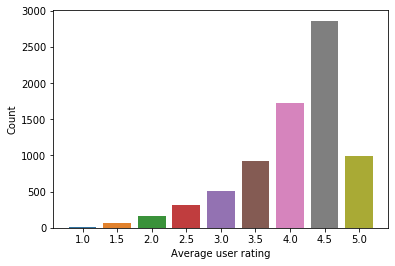

In [20]:
# User rating distribution
ax = sns.countplot(data=df,x='Average User Rating')
ax.set_xlabel('Average user rating')
ax.set_ylabel('Count')
ax.plot()

In [21]:
df.isna().sum()

Average User Rating    9446
User Rating Count      9446
Price                    24
Developer                 0
Age Rating                0
                       ... 
89.99                     0
9.49                      0
9.99                      0
94.99                     0
99.99                     0
Length: 139, dtype: int64

In [22]:
# Since we are predicting User Rating it would be incorrect to replace nan values by its mean as it will skew the data.
# Hence we drop nan values
df = df.dropna().reset_index(drop = True)

In [23]:
df

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Original Release Date,Current Version Release Date,Action,...,74.99,79.99,8.49,8.99,84.99,89.99,9.49,9.99,94.99,99.99
0,4.0,3553.0,2.99,4801,4,15853568.0,6,304,3430,0,...,0,0,0,0,0,0,0,0,0,0
1,3.5,284.0,1.99,3992,4,12328960.0,6,304,3782,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,8376.0,0.00,905,4,674816.0,6,304,3409,0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,190394.0,0.00,4801,4,21552128.0,6,197,3430,0,...,0,0,0,0,0,0,0,0,0,0
4,3.5,28.0,2.99,6067,4,34689024.0,6,192,3848,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.0,6.0,0.00,3609,12,151308288.0,6,4222,4222,0,...,0,0,0,0,0,0,0,0,0,0
7557,5.0,30.0,0.00,742,4,79646720.0,6,4214,4214,1,...,0,0,0,0,0,0,0,0,0,0
7558,5.0,51.0,0.00,1310,9,125348864.0,6,4222,4222,0,...,0,0,0,0,0,0,0,0,0,0
7559,5.0,5.0,0.00,6269,4,128687104.0,6,4219,4219,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression

In [24]:
results = pd.DataFrame(columns=["R-Squared(train)", "RMSE(train)", "R-squared(test)", "RMSE(test)", "MAE(train)", "MAE(test)"])

In [25]:
y = list(df.columns)[0]
x = list(df.columns)[1:]
X = df[x]
Y = df[y]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=18, test_size = 0.2)

In [26]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
score_train = linreg.score(X_train, y_train)

#root mean squared error on train set
y_pred_train = linreg.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_mae_train = mean_absolute_error(y_train, y_pred_train)
print("R-squared score on train set:", score_train)  # r squared score on train set
print("Root mean-squared error on train set:", lin_rmse_train)
print("Mean-absolute error on train set:", lin_mae_train)


# r squared score on test set
score_test = linreg.score(X_test, y_test)

# mean squared error on test set
y_pred = linreg.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_mae_test = mean_absolute_error(y_test, y_pred)

print("R-squared score on test set:", score_test)
print("Root mean-squared error on test set:", lin_rmse_test)
print("Mean-absolute error on test set:", lin_mae_test)

results.loc["Logistic Regression"] = [score_train, lin_rmse_train, score_test, lin_rmse_test, lin_mae_train, lin_mae_test]

R-squared score on train set: 0.13461298132275978
Root mean-squared error on train set: 0.7021880304653114
Mean-absolute error on train set: 0.5283360361711461
R-squared score on test set: 0.10937101589936449
Root mean-squared error on test set: 0.6955407827198452
Mean-absolute error on test set: 0.5416642492174466


## Decision Tree

In [28]:
dtregr = DecisionTreeRegressor(max_depth=5)
dtregr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
#r-squared score
score_train = dtregr.score(X_train, y_train)
#root mean squared error on train set
y_pred_train = dtregr.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_mae_train = mean_absolute_error(y_train, y_pred_train)
print('R-squared score on train set: {:.3f}'.format(score_train))
print("Root mean-squared error on train set:", lin_rmse_train)
print("Mean-absolute error on train set:", lin_mae_train)

score_test = dtregr.score(X_test, y_test)
y_pred = dtregr.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_mae_test = mean_absolute_error(y_test, y_pred)
print('R-squared score on test set: {:.3f}'.format(score_test))
print("Root mean-squared error on test set:", lin_rmse_test)
print("Mean-absolute error on test set:", lin_mae_test)

results.loc["Decision Tree"] = [score_train, lin_rmse_train, score_test, lin_rmse_test, lin_mae_train, lin_mae_test]

R-squared score on train set: 0.185
Root mean-squared error on train set: 0.6813048446995967
Mean-absolute error on train set: 0.5058296903501583
R-squared score on test set: 0.129
Root mean-squared error on test set: 0.6877599434160819
Mean-absolute error on test set: 0.5290481810407153


## Random Forest

In [30]:
regr = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [31]:
#r-squared score
score_train = regr.score(X_train, y_train)
#root mean squared error on train set
y_pred_train = regr.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_mae_train = mean_absolute_error(y_train, y_pred_train)
print('R-squared score on train set: {:.3f}'.format(score_train))
print("Root mean-squared error on test set:", lin_rmse_train)
print("Mean-absolute error on train set:", lin_mae_train)

score_test = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_mae_test = mean_absolute_error(y_test, y_pred)
print('R-squared score on test set: {:.3f}'.format(score_test))
print("Root mean-squared error on test set:", lin_rmse_test)
print("Mean-absolute error on test set:", lin_mae_test)


results.loc["Random Forest"] = [score_train, lin_rmse_train, score_test, lin_rmse_test, lin_mae_train, lin_mse_test]

R-squared score on train set: 0.716
Root mean-squared error on test set: 0.4019910190560739
Mean-absolute error on train set: 0.296049573850676
R-squared score on test set: 0.217
Root mean-squared error on test set: 0.6521392705092844
Mean-absolute error on test set: 0.49543726773129043


In [32]:
results

,R-Squared(train),RMSE(train),R-squared(test),RMSE(test),MAE(train),MAE(test)
Logistic Regression,0.134613,0.702188,0.109371,0.695541,0.528336,0.541664
Decision Tree,0.185321,0.681305,0.129186,0.687760,0.505830,0.529048
Random Forest,0.716380,0.401991,0.217053,0.652139,0.296050,0.425286


In [33]:
# Feature importance scores for top 10 features
feature_importances = regr.feature_importances_
sorted(zip(feature_importances, x), reverse = True)[:10]

[(0.18412012199308442, 'Original Release Date'),
 (0.16537781461271014, 'User Rating Count'),
 (0.14196378452574776, 'Current Version Release Date'),
 (0.13520917999041202, 'Size'),
 (0.11566372637352484, 'Developer'),
 (0.025786037744029638, 'Price'),
 (0.02224957521086006, 'Age Rating'),
 (0.017133845842364482, 'Simulation'),
 (0.016353496299983616, 'Puzzle'),
 (0.013300271320475565, 'Entertainment')]

## Predict

In [34]:
games.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [87]:
num_attributes = ['User Rating Count', 'Price', 'Age Rating', 'Size' ]
cat_val = ['In-app Purchases', 'Genres']
label_val = ['Developer', 'Primary Genre']
dates = ['Original Release Date', 'Current Version Release Date']
descr = {'In-app Purchases' : "Comma separated float ex: 0.99,1.99,2.99", 'Genres': 'Comma separated genres ex: Action,Adventure'}

In [110]:
def get_cat():
    ret = dict()
    for attr in cat_val:
        ret[attr] = input("Please enter "+ attr+ ": ").split(',')
    return ret

def get_num():
    ret = dict()
    for attr in num_attributes:
        if attr == "price":
            continue
        ret[attr] = float(input("Please enter "+ attr+ ": "))
    return ret

def get_dates():
    ret = dict()
    for d in dates:
        ret[d] = input("Please enter " + d+ " in \"DD/MM/YYYY\" fomrat: ")
        ret[d] = (pd.to_datetime(ret[d]) - min_date).days
    return ret

def get_labels():
    ret = dict()
    for l in label_val:
        ret[l] = input("Please enter "+l+": ")
    return ret
    

def predict():
    for k in descr:
        print(k, descr[k])
    X = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=list(X_train.columns))
    
    cat_vals = get_cat()
    num_vals = get_num()
    date_vals = get_dates()
    label_vals = get_labels()
    
    for attr in num_vals:
        X[attr] = num_vals[attr]
    for attr in cat_vals:
        X[cat_vals[attr]] = 1
    for d in dates:
        X[d] = date_vals[d]
    X['Developer'] = lb_dev.transform([label_vals['Developer']])[0]
    X['Primary Genre'] = lb_genre.transform([label_vals['Primary Genre']])[0]
#     print(X)
    pred = regr.predict(X)
    print("Predicted rating of app is:", pred)

def options():
    for attr in num_attributes:
        print(attr, " int value")
        print()
    for attr in cat_val:
        print(attr, " : ", games[attr].dropna().unique())
        print()
    for attr in label_val:
        print(attr, " : ", games[attr].unique())
        print()

In [111]:
cont = 'y'
options()
while(cont == 'y'):
    predict()
    cont = input("predict another app rating? 'y' or 'n': ")

User Rating Count  int value

Price  int value

Age Rating  int value

Size  int value

In-app Purchases  :  ['1.99' '0.99' '1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99' ...
 '0.99, 5.99, 12.99, 1.99, 79.99, 26.99' '1.99, 9.99, 4.99, 2.99, 0.99'
 '9.99, 49.99, 3.99']

Genres  :  ['Games, Strategy, Puzzle' 'Games, Strategy, Board'
 'Games, Board, Strategy' ... 'Games, Strategy, Sports, Music'
 'Social Networking, Games, Strategy, Casual'
 'Sports, Racing, Games, Strategy']

Developer  :  ['Mighty Mighty Good Games' 'Kiss The Machine' 'Bayou Games' ...
 'Vishal Baldha' 'Tayrem Games' 'ming bo tang']

Primary Genre  :  ['Games' 'Entertainment' 'Finance' 'Sports' 'Reference' 'Medical'
 'Education' 'Utilities' 'Book' 'Travel' 'Productivity' 'Lifestyle'
 'Business' 'News' 'Social Networking' 'Health & Fitness' 'Music'
 'Stickers' 'Food & Drink' 'Shopping' 'Navigation']

In-app Purchases Comma separated float ex: 0.99,1.99,2.99
Genres Comma separated genres ex: Action,Adventure
Please enter In-a